# Ames Housing Sale Price Analysis

Dorianny Molina-Codella

## Executive Summary

For this project we are going to elaborate a report, in which we'll find information regarding the Dataset, its values type, how many houses were sold in the 2006-2010 range and all its important related information. With this data, we'll build a Histogram and Scatter plots to help us to compare between variables. First we're gonna elaborate an Histogram to get a visualization of the numbers of homes sold between 2006 to 2010 and its Sale Price. Then we're making a scatter plot that will allow us to visualize the effects of one subset that might or might not influence the Sale Price. And for the last part, we'll build a new scatter plot with this new subset to picture that if when changing one the other does it in the same proportion, this, to demonstrate if it is influenced by this second one or not.

## The Data
For this project we will use the Ames Housing dataset. This dataset includes as its columns information about each house sold in Ames, Iowa in the years 2006 to 2010. Each row represent a home that was sold, and includes important information for each house, such as the: `Sale Price`, `Year when Built`, `Year when Sold`, `Lot area` and much more, which can be useful for any analisis we wish to elaborate.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

In [2]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Distribution of `SalePrice`

In [4]:
print(f"Sale Price mean is: {df['SalePrice'].mean()}, the median is {df['SalePrice'].median()}, and the Standard Deviation \
is {df['SalePrice'].std()}.")

Sale Price mean is: 180921.19589041095, the median is 163000.0, and the Standard Deviation is 79442.50288288663.


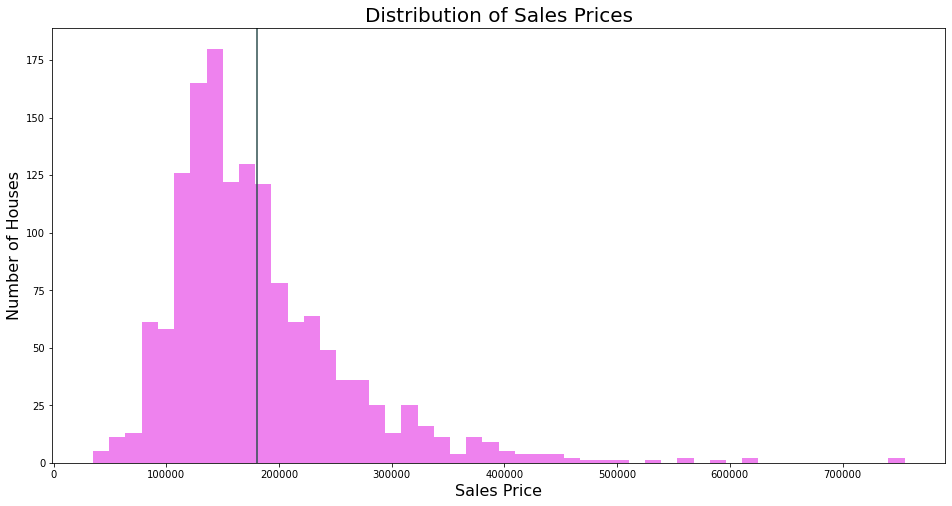

In [5]:
fig, ax=plt.subplots(figsize=(16,8))
plt.hist(df['SalePrice'], bins=50, color='violet')
ax.axvline(x=df['SalePrice'].mean(), color='darkslategrey')
ax.set_xlabel("Sales Price", fontsize=16)
ax.set_ylabel("Number of Houses", fontsize=16)
ax.set_title("Distribution of Sales Prices", fontsize=20);

In our data, when analyzing the 'Sale Price', we got that the mean is 181k, the median is 163k and the standard deviation from one price to another is 79k. We can visualize 2 peaks which are the price that many houses have in common. Our data is not symmetric, and it’s skewed to the right. The shape of our graph is not uniform.

## Differences between Subsets

We're going to create a subset based on the quality of the house sold and its price. For this specific column we rate the Overall Quality of a house the following way:

       10   Very Excellent
       9    Excellent
       8    Very Good
       7    Good
       6    Above Average   
       5    Average
       4    Below Average   
       3    Fair
       2    Poor
       1    Very Poor

for the analysis we want, we are going to group this rates by the following: 'Fair' for 1 to 4, 'Average' for 5 to 7 and 'Excellent' for 8 and up.

In [6]:
OverallQual_excelent = df.loc[df['OverallQual'] >= 8]
OverallQual_average= df[(df['OverallQual'] <= 7) & (df['OverallQual'] >=5)]
OverallQual_fair = df.loc[df['OverallQual'] <= 4]
print(f"Number of Houses with Excelent Quality {len(OverallQual_excelent)}, with Average quality {len(OverallQual_average)} \
and with Fair Quality: {len(OverallQual_fair)}.")

Number of Houses with Excelent Quality 229, with Average quality 1090 and with Fair Quality: 141.


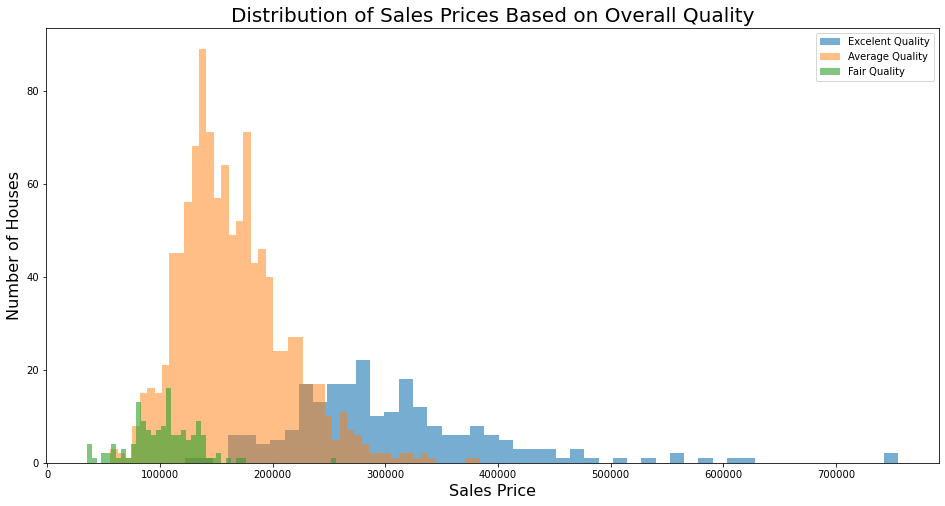

In [7]:
fig2,ax2=plt.subplots(figsize=(16,8))

plt.hist(OverallQual_excelent['SalePrice'], bins=50, alpha=0.6, label="Excelent Quality")
plt.hist(OverallQual_average['SalePrice'], bins=50, alpha=0.5, label="Average Quality")
plt.hist(OverallQual_fair['SalePrice'], bins=50, alpha=0.6, label="Fair Quality")

plt.legend(loc='upper right')
ax2.set_xlabel("Sales Price", fontsize=16)
ax2.set_ylabel("Number of Houses", fontsize=16)
ax2.set_title("Distribution of Sales Prices Based on Overall Quality", fontsize=20);

For houses with the Fair Quality the price range is no more that 150k, and the number of houses is really inferior too. For the excellent Quality we can visualize we have a wide spread, which includes a huge variety in the price. For the last one and bigger graph we got the Average Quality, which includes a large quantity of houses with that quality and the price is maintained in its majority inside the 100k-250k range. The sales distribution for these subsets is higher in the Excellent quality category.

## Correlation between `OverallQual` and `SalePrice`

We're going to work with the correlation between OverallQual and SalePrice to check if there's a correlation between the Sale Price and the Quality to check if the Quality influences the House Price.

In [8]:
df['OverallQual'].corr(df['SalePrice'])

0.7909816005838051

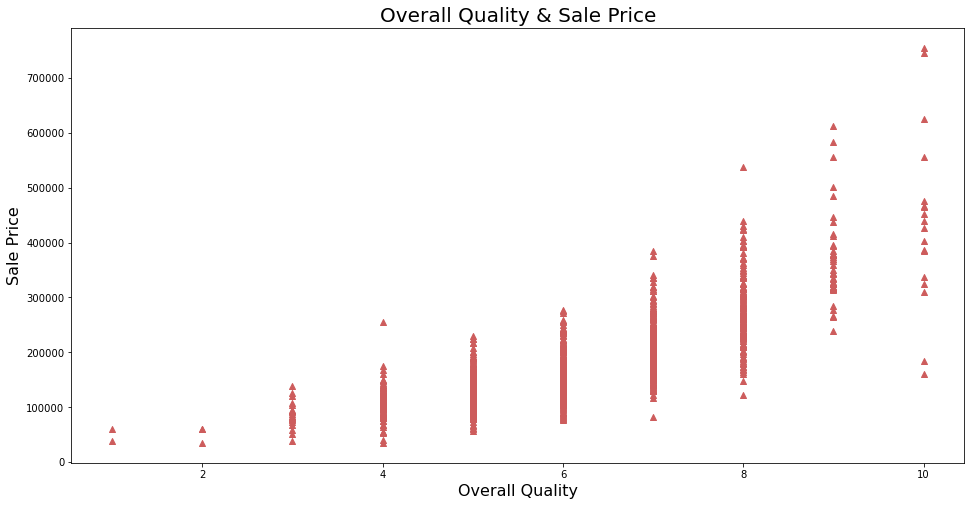

In [9]:
fig3,ax3=plt.subplots(figsize=(16,8))
ax3.scatter(x=df['OverallQual'], y=df['SalePrice'], color='indianred', marker='^')
ax3.set_xlabel("Overall Quality", fontsize=16)
ax3.set_ylabel("Sale Price", fontsize=16)
ax3.set_title("Overall Quality & Sale Price", fontsize=20);

Based on the scatter plot we can see how the Sale Price increases as the Overall Quality increases too. Our correlation being equal to 0,7 means that the Sale Price changes proportionally with the Overall Quality.

## Engineered Feature: [Age]

In [10]:
df['Age']=(df['YrSold'] - df['YearBuilt'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [11]:
len(df [(df['Age'] > 20) & (df['Age'] <= 60)])

604

In [12]:
len(df[(df['Age'] <= 20)]) 

564

In [13]:
len(df[(df['Age'] > 60)]) 

292

In [14]:
df['Age'].corr(df['SalePrice'])

-0.523350417546816

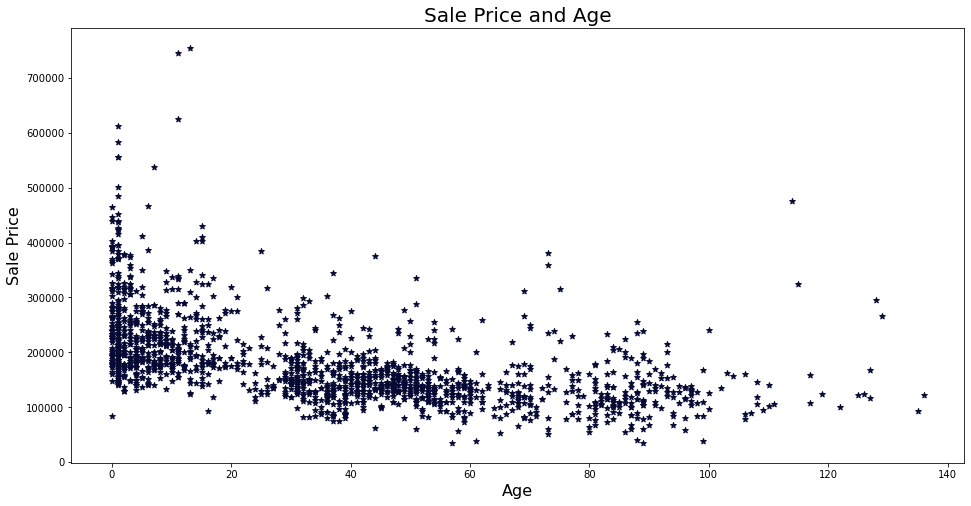

In [15]:
fig4,ax4=plt.subplots(figsize=(16,8))
ax4.scatter(x=df['Age'], y=df['SalePrice'], c='#060933', marker='*')
ax4.set_xlabel("Age", fontsize=16)
ax4.set_ylabel("Sale Price", fontsize=16)
ax4.set_title("Sale Price and Age", fontsize=20);

Age variable is related to the age of the house, the date when it was last sold minus the date when the house was built. Newer houses tend to be more expensive than older ones. But in the graph we can appreciate that the quantity of houses sold with 30 to 60 years old is similar to the quantity of houses with age 20 or newer. Visualizing the prices we can tell that it's a huge amount of houses between the range of 100k to 200k, which we could say it's the common price regardless the age of the house. Viewing the correlation as -0,52 we could say that the changes in the Age will result in a moderate opposite change with the Sale Price. It's opposite because more age less the SalePrice.